In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn import metrics as mt
from numpy import sqrt 
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import shap
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 300)

In [4]:
diabetic = pd.read_csv('C:/Users/ZachZaiken/Google Drive/ZZ_backup/SMU_zz/QTW/diabetic_data.csv', na_values=['?', ' '])

In [5]:
diabetic.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
diabetic.shape

(101766, 50)

In [7]:
diabetic.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [8]:
diabetic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#Check the percentage of the missing values in each column
diabetic.isna().mean()

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.022336
gender                      0.000000
age                         0.000000
weight                      0.968585
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.395574
medical_specialty           0.490822
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000206
diag_2                      0.003518
diag_3                      0.013983
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
c

### Missing Data

In [10]:
missing_df = pd.DataFrame(diabetic.isna().mean()).reset_index()

missing_df.rename(columns={ missing_df.columns[1]: "percent_missing" },inplace=True)
missing_df.rename(columns={ missing_df.columns[0]: "feature" },inplace=True)

missing_df = missing_df.sort_values('percent_missing', ascending=False)
missing_df[(missing_df['percent_missing'] > 0)]

,feature,percent_missing
5,weight,0.968585
11,medical_specialty,0.490822
10,payer_code,0.395574
2,race,0.022336
20,diag_3,0.013983
19,diag_2,0.003518
18,diag_1,0.000206


### Total classes per column

In [12]:
class_df = pd.DataFrame(diabetic.drop(['encounter_id', 'patient_nbr'],axis=1).nunique()).reset_index()
class_df.rename(columns={ class_df.columns[1]: "number_of_classes" },inplace=True)
class_df.rename(columns={ class_df.columns[0]: "feature" },inplace=True)
class_df = class_df.sort_values('number_of_classes', ascending=False)
class_df.head(n=15)
#print(diabetic.nunique())

,feature,number_of_classes
18,diag_3,789
17,diag_2,748
16,diag_1,716
10,num_lab_procedures,118
12,num_medications,75
9,medical_specialty,72
13,number_outpatient,39
14,number_emergency,33
5,discharge_disposition_id,26
15,number_inpatient,21


In [13]:
#Weight column has over 96% missing rate, so we decided to delete weight column
#The missing value in race is about 2%, so we can impute the missing values.
#Check race==other percentage
diabetic[diabetic['race']=='Other'].shape[0]/diabetic.shape[0]

0.014798655739637992

In [14]:
#Race==Other is about 1.5% among race column, so we decided to impute missing values in race column with race 'Other'
#We need to create a new dataframe for imputed values.
dia_df = diabetic

In [15]:
diabetic['medical_specialty'].value_counts()

InternalMedicine                        14635
Emergency/Trauma                         7565
Family/GeneralPractice                   7440
Cardiology                               5352
Surgery-General                          3099
Nephrology                               1613
Orthopedics                              1400
Orthopedics-Reconstructive               1233
Radiologist                              1140
Pulmonology                               871
Psychiatry                                854
Urology                                   685
ObstetricsandGynecology                   671
Surgery-Cardiovascular/Thoracic           652
Gastroenterology                          564
Surgery-Vascular                          533
Surgery-Neuro                             468
PhysicalMedicineandRehabilitation         391
Oncology                                  348
Pediatrics                                254
Hematology/Oncology                       207
Neurology                         

In [16]:
diabetic['payer_code'].value_counts()

MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [17]:
diabetic['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [18]:
dia_df.loc[dia_df['race'].isna(), 'race'] = 'Other'

In [19]:
#Drop weight column
dia_df = dia_df.drop('weight', axis=1).copy()

In [189]:
#Almost half of the medical_specialty column values are missing
#Here we will impute the missing values by taking the values from previous row.
#dia_df['medical_specialty'].fillna(method='pad', inplace=True)

In [20]:
dia_df.loc[dia_df['medical_specialty'].isna(), 'medical_specialty']= 'InternalMedicine'

In [21]:
dia_df.loc[dia_df['payer_code'].isna(), 'payer_code']= 'MC'

In [22]:
dia_df[dia_df['payer_code'].isna()]

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [23]:
diag1_top100 = ['428',
'414',
'786',
'410',
'486',
'427',
'491',
'715',
'682',
'434',
'780',
'996',
'276',
'38',
'250.8',
'599',
'584',
'V57',
'250.6',
'518',
'820',
'577',
'493',
'435',
'562',
'574',
'296',
'560',
'250.7',
'250.13',
'440',
'433',
'998',
'722',
'250.02',
'578',
'250.11',
'507',
'789',
'453',
'530',
'8',
'403',
'535',
'415',
'402',
'295',
'724',
'458',
'162',
'997',
'250.12',
'250.82',
'278',
'733',
'285',
'592',
'401',
'482',
'590',
'558',
'197',
'280',
'824',
'250.1',
'153',
'426',
'569',
'648',
'571',
'531',
'511',
'787',
'250.4',
'404',
'707',
'411',
'198',
'572',
'466',
'812',
'250',
'552',
'730',
'V58',
'532',
'575',
'600',
'250.03',
'540',
'557',
'331',
'805',
'250.81',
'424',
'721',
'436',
'185',
'431',
'618']

diag2_top_100 = ['276',
'428',
'250',
'427',
'401',
'496',
'599',
'403',
'414',
'411',
'250.02',
'707',
'585',
'584',
'491',
'250.01',
'285',
'780',
'425',
'682',
'486',
'518',
'424',
'413',
'250.6',
'493',
'305',
'786',
'280',
'998',
'410',
'511',
'785',
'38',
'996',
'272',
'571',
'197',
'V45',
'295',
'440',
'577',
'162',
'560',
'788',
'997',
'41',
'300',
'578',
'574',
'453',
'789',
'648',
'402',
'198',
'799',
'287',
'426',
'530',
'303',
'70',
'278',
'V42',
'438',
'730',
'591',
'250.03',
'250.41',
'790',
'342',
'492',
'196',
'787',
'250.8',
'404',
'250.92',
'112',
'8',
'536',
'507',
'535',
'434',
'733',
'784',
'202',
'396',
'250.82',
'569',
'263',
'304',
'250.4',
'V85',
'284',
'710',
'296',
'515',
'V58',
'294',
'244',
'433']

diag3_top_100 = ['250',
'401',
'276',
'428',
'427',
'414',
'496',
'403',
'585',
'272',
'599',
'515',
'V45',
'250.02',
'707',
'780',
'285',
'425',
'250.6',
'424',
'584',
'305',
'250.01',
'682',
'518',
'41',
'493',
'278',
'530',
'786',
'491',
'486',
'244',
'V58',
'250.4',
'411',
'280',
'357',
'785',
'287',
'197',
'511',
'402',
'787',
'788',
'412',
'593',
'V15',
'413',
'438',
'998',
'250.8',
'294',
'799',
'571',
'560',
'295',
'995',
'997',
'789',
'458',
'535',
'996',
'70',
'426',
'536',
'263',
'578',
'V42',
'300',
'V10',
'198',
'784',
'396',
'440',
'E849',
'311',
'715',
'296',
'V43',
'453',
'410',
'303',
'112',
'443',
'V12',
'733',
'250.41',
'790',
'8',
'562',
'730',
'331',
'162',
'416',
'492',
'E878',
'342',
'38',
'304']



In [24]:
def diag_top100(df,top100_list,col_name):   
    diag_clean = []
    for i in range(len(df)):   
        val = df[i:i+1][col_name].values[0]
        if val == '?' or val == ''or val == np.NaN:
            val2 = 'Other'
        elif val in top100_list:
            val2 = val
        else:
            val2 = 'Other'
        diag_clean.append(val2)
    return diag_clean
    

In [66]:
#diag_clean = []
#for i in range(len(dia_df)):   
#    val = dia_df[i:i+1]['diag_1'].values[0]
#    if val == '?':
#        val2 = 'Other'
#    elif val in diag1_top100:
#        val2 = val
#    else:
#        val2 = 'Other'
#    diag_clean.append(val2)

In [25]:
new_diag1= diag_top100(dia_df,diag1_top100,'diag_1')

In [26]:
new_diag2= diag_top100(dia_df,diag2_top_100,'diag_2')

In [27]:
new_diag3= diag_top100(dia_df,diag3_top_100,'diag_3')

In [28]:
dia_df['new_diag1'] = new_diag1
dia_df['new_diag2'] = new_diag2
dia_df['new_diag3'] = new_diag3

In [193]:
#There is still one row contains missing value, we use front fill this time.
#dia_df['payer_code'].fillna(method='ffill', inplace=True)

In [194]:
#By observing columns diag_1, diag_2 and diag_3, we found there are values containing 'E' or 'V'.
#Thus, we decided to create three new columns based on the values in diag_1, 2 and 3. 
#In the new columns, they are defined by two classes, contains 'E' or 'V' and without 'E' or 'V'
#First, we impute the missing values by 0 in three columns.
#https://www.hindawi.com/journals/bmri/2014/781670/tab2/
dia_df['diag_1'].fillna(0, inplace=True)
dia_df['diag_2'].fillna(0, inplace=True)
dia_df['diag_3'].fillna(0, inplace=True)

In [195]:
class_1 = ['428','250','276','414','401','427','599','496','403','486','786','780','491','410','682','584','250.02','585','707','518']

In [196]:
#Any values in class_1 are categorized to one class, values not in class 1 are categorized to the other class. So it only has 0 and 1 two classes.
#Logistic regression was built based on this code.
dia_df['diag_1_new'] = dia_df['diag_1'].isin(class_1)
dia_df['diag_2_new'] = dia_df['diag_2'].isin(class_1)
dia_df['diag_3_new'] = dia_df['diag_3'].isin(class_1)

In [197]:
#Any values in class_1, assign its original value, if not, assign 0.
#Choose above or this code block. 
#dia_df['diag_1_new']=[x if x in class_1 else 0 for x in dia_df['diag_1']]
#dia_df['diag_2_new']=[x if x in class_1 else 0 for x in dia_df['diag_2']]
#dia_df['diag_3_new']=[x if x in class_1 else 0 for x in dia_df['diag_3']]

In [198]:
dia_df['diag_1_new'].value_counts()

False    59783
True     41983
Name: diag_1_new, dtype: int64

In [29]:
#Drop the old diag_1, 2, 3 columns.
dia_df = dia_df.drop(['diag_1', 'diag_2', 'diag_3'], axis=1).copy()

In [30]:
#Our target is to predict the readmission within 30 days.
#So larger than 30 days or no readmission can be both categorized as no readmission.
dia_df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [31]:
dia_df['readmitted_class'] = [0 if x=='NO' else 1 for x in dia_df['readmitted']]

In [32]:
dia_df['readmitted_class'].value_counts()
#The number matches

0    54864
1    46902
Name: readmitted_class, dtype: int64

In [33]:
dia_df['admission_type_id'] = dia_df['admission_type_id'].astype('category')
dia_df['discharge_disposition_id'] = dia_df['discharge_disposition_id'].astype('category')
dia_df['admission_source_id'] = dia_df['admission_source_id'].astype('category')
dia_df['time_in_hospital'] = dia_df['time_in_hospital'].astype('category')
dia_df['num_lab_procedures'] = dia_df['num_lab_procedures'].astype('category')
dia_df['num_procedures'] = dia_df['num_procedures'].astype('category')
dia_df['num_medications'] = dia_df['num_medications'].astype('category')
dia_df['number_outpatient'] = dia_df['number_outpatient'].astype('category')
dia_df['number_emergency'] = dia_df['number_emergency'].astype('category')
dia_df['number_inpatient'] = dia_df['number_inpatient'].astype('category')
dia_df['number_diagnoses'] = dia_df['number_diagnoses'].astype('category')
dia_df['readmitted_class'] = dia_df['readmitted_class'].astype('int')
dia_df['new_diag1'] = dia_df['new_diag1'].astype('category')
dia_df['new_diag2'] = dia_df['new_diag2'].astype('category')
dia_df['new_diag3'] = dia_df['new_diag3'].astype('category')

In [34]:
#Drop encounter_id, patient_nbr and response variable
X = dia_df.drop(['readmitted','readmitted_class','encounter_id','patient_nbr'], axis=1).copy()
y = dia_df['readmitted_class'].copy()

In [35]:
X.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'new_diag1',
       'new_diag2', 'new_diag3'],
      dtype='object')

In [36]:
cols = X.columns
X= pd.get_dummies(X, columns=cols)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Columns: 867 entries, race_AfricanAmerican to new_diag3_V58
dtypes: uint8(867)
memory usage: 84.1 MB


In [38]:
X.head()

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),age_[10-20),age_[20-30),age_[30-40),age_[40-50),age_[50-60),age_[60-70),age_[70-80),age_[80-90),age_[90-100),admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_type_id_4,admission_type_id_5,admission_type_id_6,admission_type_id_7,admission_type_id_8,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,discharge_disposition_id_6,discharge_disposition_id_7,discharge_disposition_id_8,discharge_disposition_id_9,discharge_disposition_id_10,discharge_disposition_id_11,discharge_disposition_id_12,discharge_disposition_id_13,discharge_disposition_id_14,discharge_disposition_id_15,discharge_disposition_id_16,discharge_disposition_id_17,discharge_disposition_id_18,discharge_disposition_id_19,discharge_disposition_id_20,discharge_disposition_id_22,discharge_disposition_id_23,discharge_disposition_id_24,discharge_disposition_id_25,discharge_disposition_id_27,discharge_disposition_id_28,admission_source_id_1,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,admission_source_id_8,admission_source_id_9,admission_source_id_10,admission_source_id_11,admission_source_id_13,admission_source_id_14,admission_source_id_17,admission_source_id_20,admission_source_id_22,admission_source_id_25,time_in_hospital_1,time_in_hospital_2,time_in_hospital_3,time_in_hospital_4,time_in_hospital_5,time_in_hospital_6,time_in_hospital_7,time_in_hospital_8,time_in_hospital_9,time_in_hospital_10,time_in_hospital_11,time_in_hospital_12,time_in_hospital_13,time_in_hospital_14,payer_code_BC,payer_code_CH,payer_code_CM,payer_code_CP,payer_code_DM,payer_code_FR,payer_code_HM,payer_code_MC,payer_code_MD,payer_code_MP,payer_code_OG,payer_code_OT,payer_code_PO,payer_code_SI,payer_code_SP,payer_code_UN,payer_code_WC,...,new_diag3_162,new_diag3_197,new_diag3_198,new_diag3_244,new_diag3_250,new_diag3_250.01,new_diag3_250.02,new_diag3_250.4,new_diag3_250.41,new_diag3_250.6,new_diag3_250.8,new_diag3_263,new_diag3_272,new_diag3_276,new_diag3_278,new_diag3_280,new_diag3_285,new_diag3_287,new_diag3_294,new_diag3_295,new_diag3_296,new_diag3_300,new_diag3_303,new_diag3_304,new_diag3_305,new_diag3_311,new_diag3_331,new_diag3_342,new_diag3_357,new_diag3_38,new_diag3_396,new_diag3_401,new_diag3_402,new_diag3_403,new_diag3_41,new_diag3_410,new_diag3_411,new_diag3_412,new_diag3_413,new_diag3_414,new_diag3_416,new_diag3_424,new_diag3_425,new_diag3_426,new_diag3_427,new_diag3_428,new_diag3_438,new_diag3_440,new_diag3_443,new_diag3_453,new_diag3_458,new_diag3_486,new_diag3_491,new_diag3_492,new_diag3_493,new_diag3_496,new_diag3_511,new_diag3_515,new_diag3_518,new_diag3_530,new_diag3_535,new_diag3_536,new_diag3_560,new_diag3_562,new_diag3_571,new_diag3_578,new_diag3_584,new_diag3_585,new_diag3_593,new_diag3_599,new_diag3_682,new_diag3_70,new_diag3_707,new_diag3_715,new_diag3_730,new_diag3_733,new_diag3_780,new_diag3_784,new_diag3_785,new_diag3_786,new_diag3_787,new_diag3_788,new_diag3_789,new_diag3_790,new_diag3_799,new_diag3_8,new_diag3_995,new_diag3_996,new_diag3_997,new_diag3_998,new_diag3_E849,new_diag3_E878,new_diag3_Other,new_diag3_V10,new_diag3_V12,new_diag3_V15,new_diag3_V42,new_diag3_V43,new_diag3_V45,new_diag3_V58
0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [39]:
dia_df.readmitted_class.values

array([0, 1, 0, ..., 0, 0, 0])

In [203]:
#scaler = StandardScaler()
#X_scl = scaler.fit_transform(X)
#X_scl = pd.DataFrame(data=X_scl, columns=X.columns)

In [40]:
y

0         0
1         1
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmitted_class, Length: 101766, dtype: int32

In [205]:
Counter(list(dia_df.readmitted_class.values))

Counter({0: 54864, 1: 46902})

In [41]:
cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=1, shuffle=True)
#y_train, y_test  = train_test_split(y,  random_state=1 , shuffle=True)
#help(train_test_split)

In [208]:
len(y)

101766

In [209]:
Counter(list(y_train))

Counter({0: 41038, 1: 35286})

In [189]:
Counter(list(y_test))

Counter({0: 13826, 1: 11616})

In [210]:
X.shape

(101766, 867)

In [84]:
Logist = LogisticRegression()

pipeline = Pipeline([
    ('clf', Logist)
])

parameters = { 'clf__penalty':['l2']
              ,'clf__C': [.01,.1, 1,10]
              ,'clf__class_weight': ['balanced']
              ,'clf__random_state': [1]
              ,'clf__solver': ['lbfgs']
              ,'clf__max_iter':[100]
             }

logGridSearch = GridSearchCV(pipeline, param_grid=parameters, cv=cv, n_jobs=5, verbose=1, scoring='roc_auc')

logGridSearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('clf', LogisticRegression())]),
             n_jobs=5,
             param_grid={'clf__C': [0.01, 0.1, 1, 10],
                         'clf__class_weight': ['balanced'],
                         'clf__max_iter': [100], 'clf__penalty': ['l2'],
                         'clf__random_state': [1], 'clf__solver': ['lbfgs']},
             scoring='roc_auc', verbose=1)

In [103]:
logGridSearch.best_estimator_

Pipeline(steps=[('clf',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    random_state=1))])

In [86]:
conf = mt.confusion_matrix(y_test, logGridSearch.predict(X_test))
print("confusion matrix\n",conf)

confusion matrix
 [[9136 4690]
 [4366 7250]]


In [87]:
y_pred = logGridSearch.predict(X_test)

In [59]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [70]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test.values,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67     13826
           1       0.61      0.62      0.62     11616

    accuracy                           0.64     25442
   macro avg       0.64      0.64      0.64     25442
weighted avg       0.64      0.64      0.64     25442



In [89]:
recall_score(y_test.values,y_pred, average=None)

array([0.66078403, 0.62413912])

In [91]:
precision_score(y_test.values,y_pred, average=None)

array([0.6766405 , 0.60720268])

In [92]:
tn, fp, fn, tp = conf.ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
print('specificity', specificity)
print('sensitivity', sensitivity, '\n')

specificity 0.6607840300882395
sensitivity 0.6241391184573003 



In [93]:
tn, fp, fn, tp = conf.ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
print('specificity', specificity)
print('sensitivity', sensitivity, '\n')

specificity 0.6607840300882395
sensitivity 0.6241391184573003 



In [95]:
cls = LogisticRegression(C=.1, penalty = 'l2', random_state=1, solver='lbfgs', class_weight='balanced', max_iter=100)


model = cls.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
yhat = yhat[::, 1]

In [96]:
conf_1 = mt.confusion_matrix(y_test, model.predict(X_test))
print("confusion matrix\n",conf_1)

confusion matrix
 [[9136 4690]
 [4366 7250]]


In [97]:
recall = mt.recall_score(y_test, model.predict(X_test))
print("recall\n",recall)

recall
 0.6241391184573003


In [98]:
precision = mt.precision_score(y_test, model.predict(X_test))
print("precision\n",precision)

precision
 0.6072026800670016


In [99]:
fpr, tpr, thresholds = roc_curve(y_test, yhat)
auc = roc_auc_score(y_test, yhat)

In [100]:
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds': pd.Series(thresholds, index=i)})
roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

results = pd.DataFrame(columns=['fpr','tpr', 'auc'])
results = {'fpr':fpr,'tpr':tpr, 'auc':auc}

threshold = pd.DataFrame(columns=['threshold'])
threshold = {'thresholds':roc_t['thresholds']}


In [101]:
print(threshold)

{'thresholds': 5719    0.491877
Name: thresholds, dtype: float64}


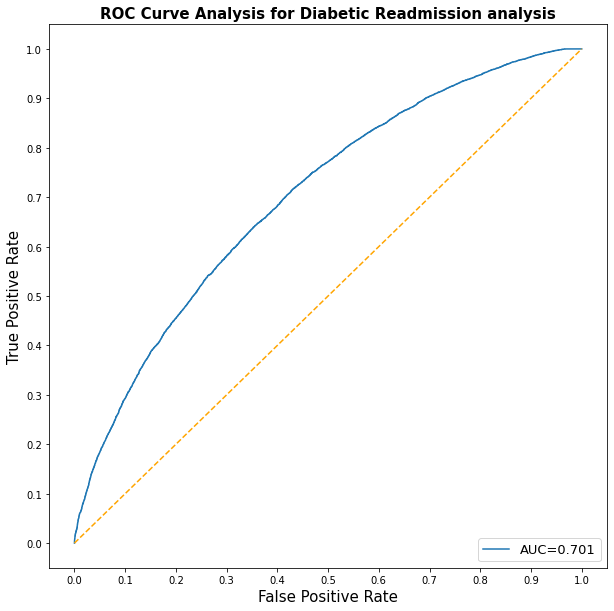

In [102]:
fig = plt.figure(figsize=(10,10))

plt.plot(results['fpr'], results['tpr'], label="AUC={:.3f}".format(results['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis for Diabetic Readmission analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [82]:
var_list = []
coeff_list = []
for i in range(len(X.columns)):
    print(X_train.columns[i], abs(cls.coef_[0][i]))
    var_list.append(X_train.columns[i])
    coeff_list.append(abs(cls.coef_[0][i])) 

race_AfricanAmerican 0.15132941618360532
race_Asian 0.18238442001064564
race_Caucasian 0.20573279386174861
race_Hispanic 0.039980479285118796
race_Other 0.08452597899439428
gender_Female 0.10330005238932201
gender_Male 0.045953072136183985
gender_Unknown/Invalid 0.09908179277032185
age_[0-10) 0.5664944519154903
age_[10-20) 0.15459732386330963
age_[20-30) 0.13310765790260096
age_[30-40) 0.02146805655791884
age_[40-50) 0.03837258537265806
age_[50-60) 0.05271309252116049
age_[60-70) 0.09463559177434588
age_[70-80) 0.16288616430541333
age_[80-90) 0.13109106319661454
age_[90-100) 0.12926963870750174
admission_type_id_1 0.09376287455577495
admission_type_id_2 0.05067310333381021
admission_type_id_3 0.03821321564415167
admission_type_id_4 0.03544209536688432
admission_type_id_5 0.14668385108839913
admission_type_id_6 0.5942469840178246
admission_type_id_7 0.4109357191870363
admission_type_id_8 0.23396289266479267
discharge_disposition_id_1 0.49702871756466166
discharge_disposition_id_2 0.4906

In [83]:
df_feature = pd.DataFrame({'Features':var_list, 'ABS_coef':coeff_list})
df_feature.sort_values(by='ABS_coef', ascending=False).head(15)

,Features,ABS_coef
36,discharge_disposition_id_11,5.359466
39,discharge_disposition_id_14,2.068850
38,discharge_disposition_id_13,1.384120
444,number_inpatient_0,1.373431
40,discharge_disposition_id_15,1.233459
741,new_diag2_648,1.124775
51,discharge_disposition_id_28,1.091873
452,number_inpatient_8,0.988348
664,new_diag1_V58,0.961582
583,new_diag1_278,0.932413
